<a href="https://colab.research.google.com/github/LauraHu820/RNN_LSTM_project/blob/main/RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [ ]:
df_stock = pd.read_csv('AAPL_stock.csv')
df_stock.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19992 entries, 0 to 19991
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  19992 non-null  int64  
 1   time        19992 non-null  object 
 2   open        19992 non-null  float64
 3   high        19992 non-null  float64
 4   low         19992 non-null  float64
 5   close       19992 non-null  float64
 6   volume      19992 non-null  int64  
 7   lagged1     19991 non-null  float64
 8   lagged2     19990 non-null  float64
 9   lagged3     19989 non-null  float64
 10  SMA50       19992 non-null  float64
 11  RSI10       19992 non-null  float64
 12  ATR         19992 non-null  float64
dtypes: float64(10), int64(2), object(1)
memory usage: 2.0+ MB


In [ ]:
# data cleaning
df = df_stock.drop(columns=['Unnamed: 0'])
df['time'] = pd.to_datetime(df['time'])
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19989 entries, 3 to 19991
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   time     19989 non-null  datetime64[ns]
 1   open     19989 non-null  float64       
 2   high     19989 non-null  float64       
 3   low      19989 non-null  float64       
 4   close    19989 non-null  float64       
 5   volume   19989 non-null  int64         
 6   lagged1  19989 non-null  float64       
 7   lagged2  19989 non-null  float64       
 8   lagged3  19989 non-null  float64       
 9   SMA50    19989 non-null  float64       
 10  RSI10    19989 non-null  float64       
 11  ATR      19989 non-null  float64       
dtypes: datetime64[ns](1), float64(10), int64(1)
memory usage: 2.0 MB


In [ ]:
df.head()

,time,open,high,low,close,volume,lagged1,lagged2,lagged3,SMA50,RSI10,ATR
3,2025-09-17 19:56:00,239.70,239.73,239.7000,239.73,297,239.7009,239.7200,239.7001,239.6332,60.5799,0.0969
4,2025-09-17 19:55:00,239.65,239.70,239.6097,239.70,4944,239.7300,239.7009,239.7200,239.6314,56.9081,0.1021
5,2025-09-17 19:54:00,239.70,239.70,239.6000,239.66,2019,239.7000,239.7300,239.7009,239.6314,51.4855,0.1030
6,2025-09-17 19:53:00,239.70,239.70,239.6100,239.70,589,239.6600,239.7000,239.7300,239.6314,58.0612,0.1032
7,2025-09-17 19:52:00,239.69,239.70,239.5700,239.70,1868,239.7000,239.6600,239.7000,239.6302,58.0612,0.1042


In [ ]:
df.describe()

,time,open,high,low,close,volume,lagged1,lagged2,lagged3,SMA50,RSI10,ATR
count,19989,19989.000000,19989.000000,19989.000000,19989.000000,1.998900e+04,19989.000000,19989.000000,19989.000000,19989.000000,19989.000000,19989.000000
mean,2025-09-02 22:46:23.295812864,232.566408,232.679682,232.407926,232.569105,5.728989e+04,232.569572,232.570040,232.570506,232.557672,50.022086,0.282253
min,2025-08-19 04:50:00,199.265300,223.885000,194.623700,205.557200,1.000000e+00,205.557200,205.557200,205.557200,224.371100,1.718800,0.022000
25%,2025-08-26 09:12:00,228.405000,228.500000,228.245000,228.403600,2.850000e+02,228.403600,228.403600,228.403600,228.412000,42.368900,0.088900
50%,2025-09-03 12:59:00,232.000000,232.080000,231.790000,232.000000,2.466000e+03,232.000000,232.000000,232.000000,231.992000,49.891900,0.132400
75%,2025-09-10 16:30:00,237.280000,237.420000,237.160100,237.290000,5.670000e+04,237.290000,237.290000,237.290000,237.289700,57.539100,0.220000
max,2025-09-17 19:56:00,243.811000,259.885800,241.020000,245.288200,3.594537e+07,245.288200,245.288200,245.288200,240.282200,98.403300,16.923900
std,NaN,4.754305,4.778834,4.892613,4.751167,4.808415e+05,4.751409,4.751653,4.751895,4.724586,12.250579,0.752813


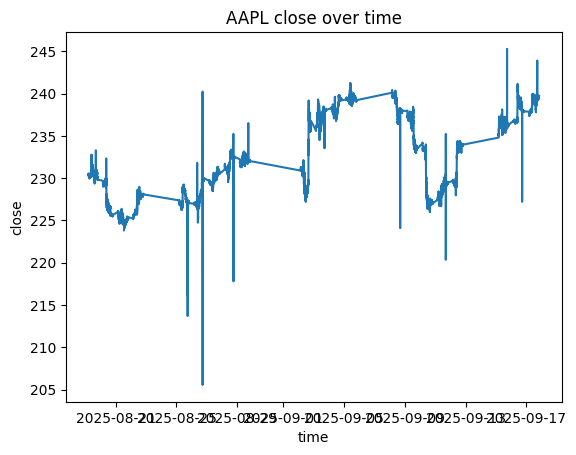

In [ ]:
# visulization of stock price
plt.plot(df['time'], df['close'])
plt.xlabel('time')
plt.ylabel('close')
plt.title('AAPL close over time')
plt.show()

Exception ignored in: <function _xla_gc_callback at 0x7d07c25af880>
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/jax/_src/lib/__init__.py", line 96, in _xla_gc_callback
    def _xla_gc_callback(*args):
    
KeyboardInterrupt: 


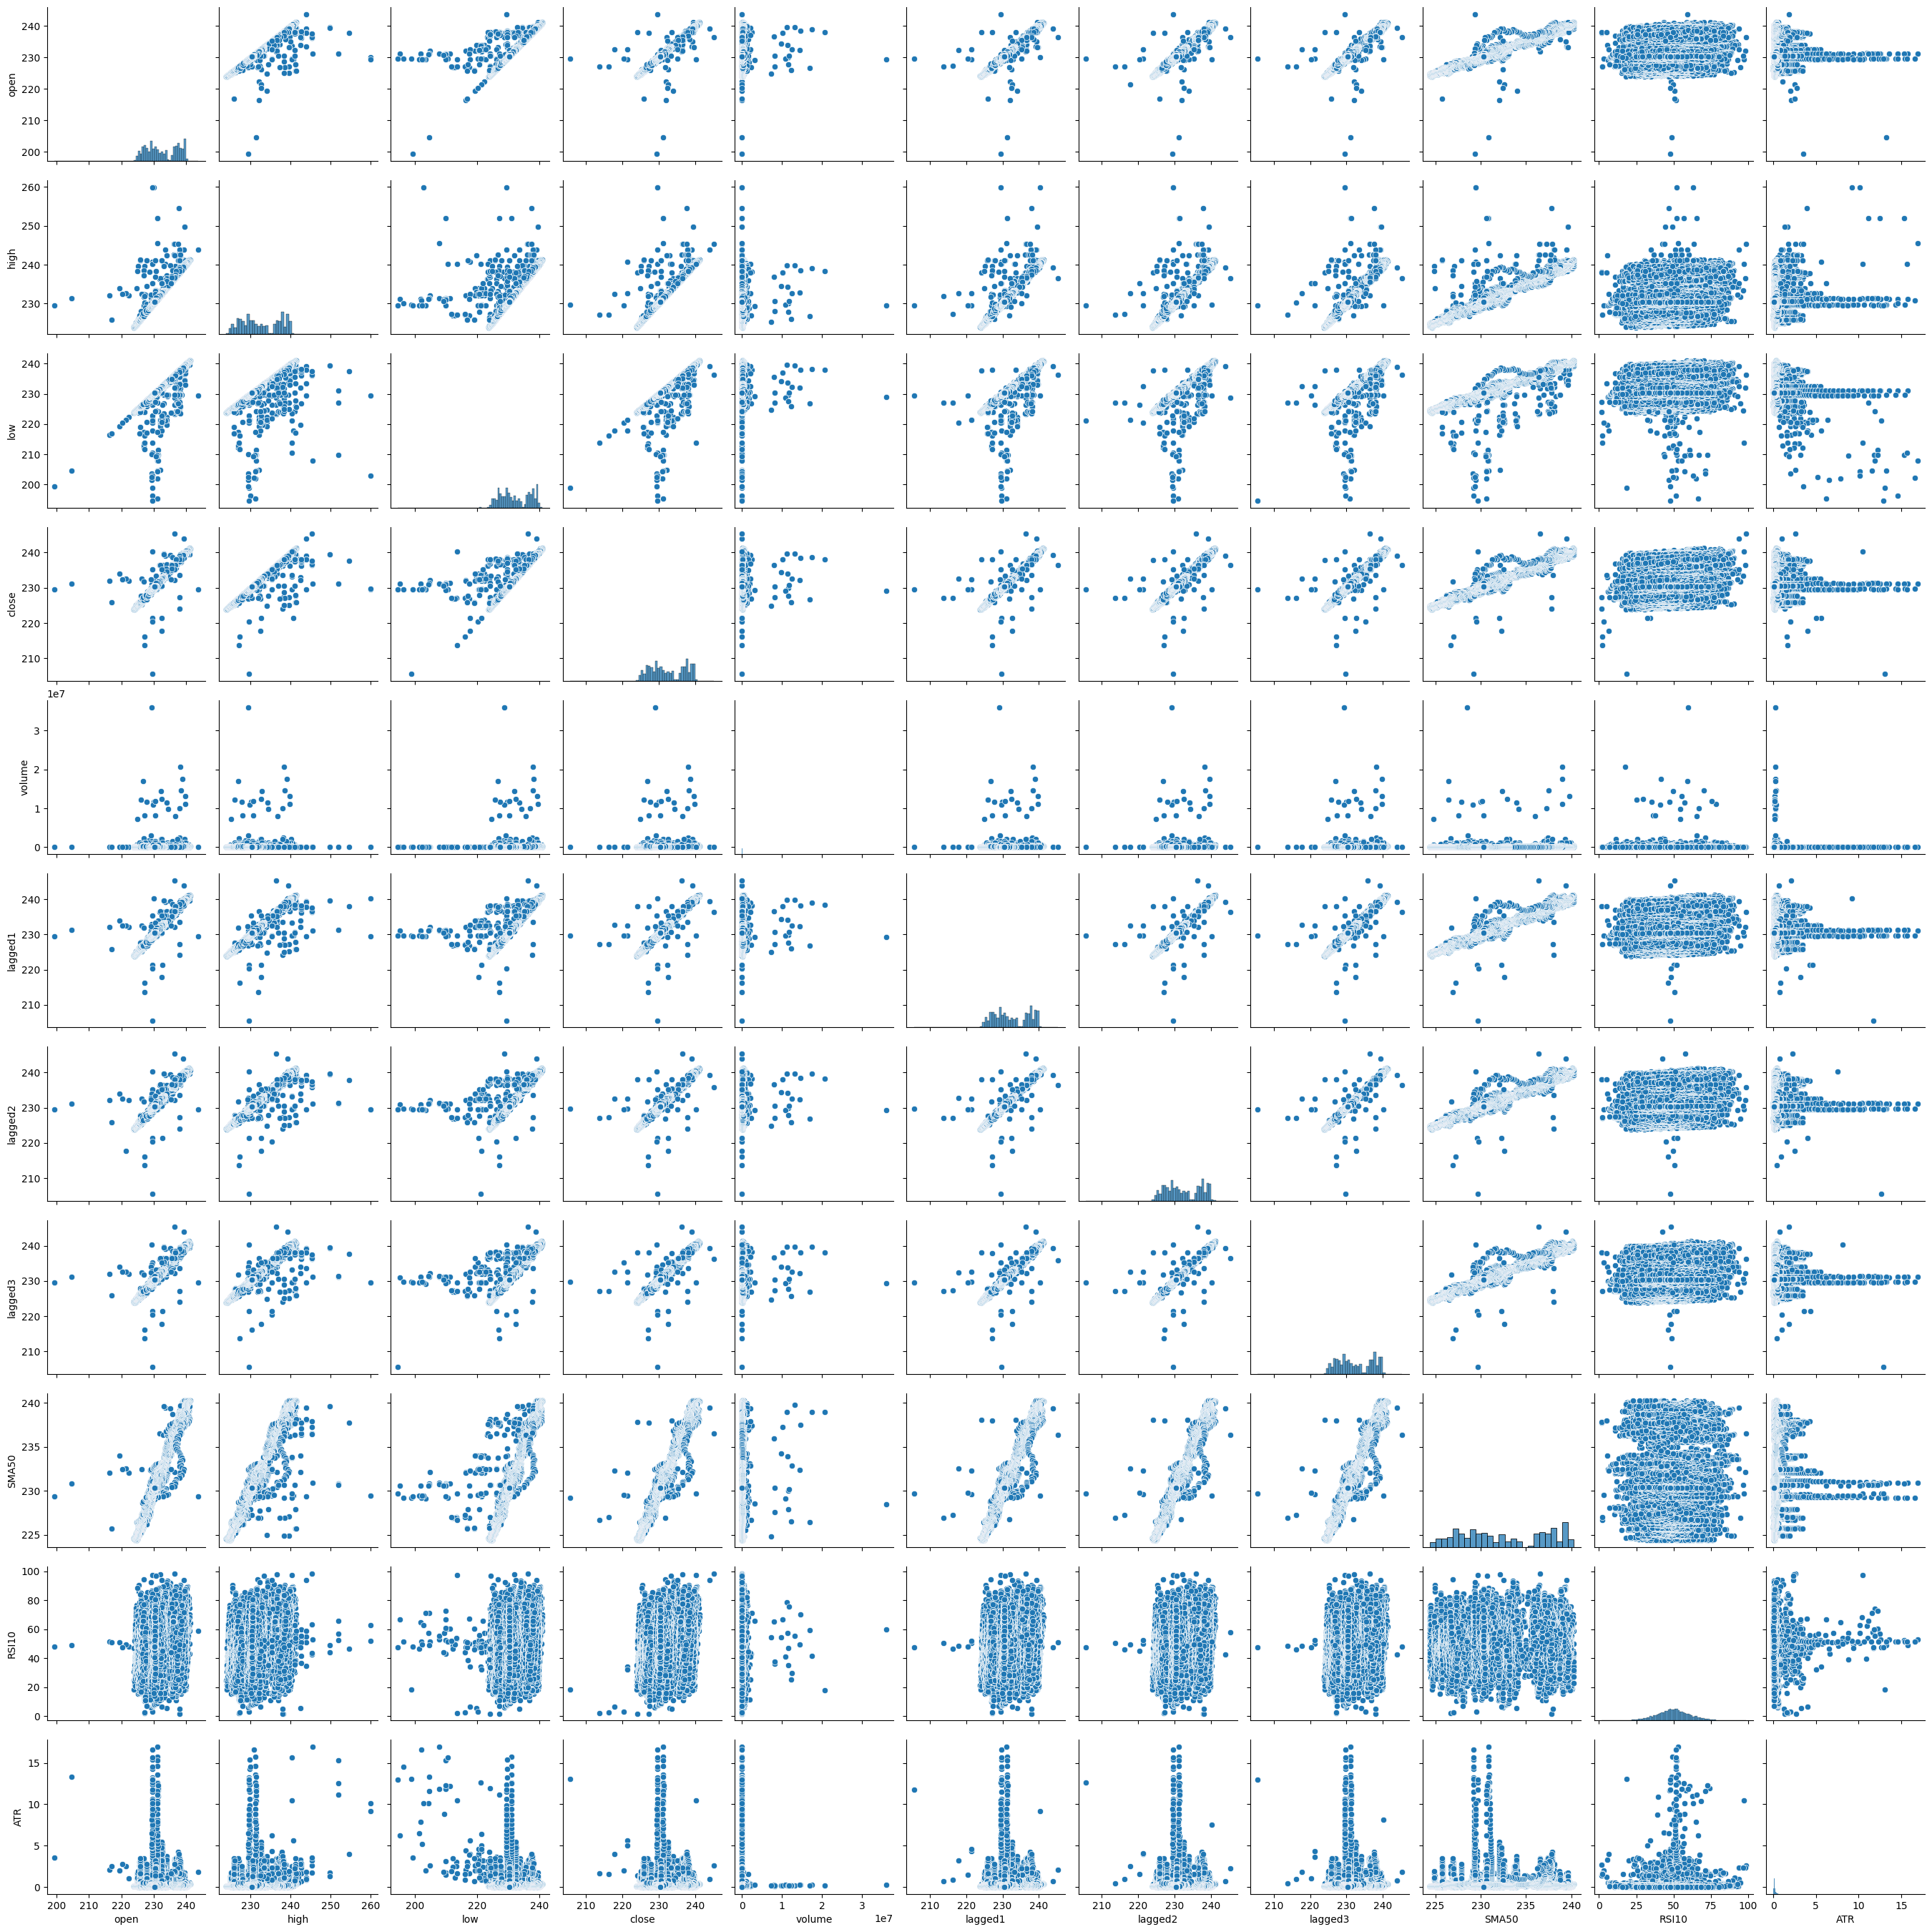

In [ ]:
sns.pairplot(df)

In [ ]:
# split the training testing set
# reverse the order based on date
df = df.sort_values(by='time')
df = df.reset_index(drop=True)
split_point = int(len(df) * 0.8)
train_df = df[:split_point]
test_df = df[split_point:].reset_index(drop=True)

In [ ]:

# standardization
scaler_x = StandardScaler()
scaler_y = StandardScaler()
X_train = train_df.drop(columns=['time', 'close', 'open', 'high', 'low'])
y_train = train_df['close']
X_test = test_df.drop(columns=['time', 'close','open', 'high', 'low'])
y_test = test_df['close']

X_train_scaled = scaler_x.fit_transform(X_train)
y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1))
X_test_scaled = scaler_x.transform(X_test)
y_test_scaled = scaler_y.transform(y_test.values.reshape(-1, 1))

In [ ]:
X_train.head()

,volume,lagged1,lagged2,lagged3,SMA50,RSI10,ATR
0,548,230.38,230.37,230.34,230.3132,52.3771,0.0447
1,31,230.37,230.34,230.38,230.3108,55.5505,0.0429
2,173,230.34,230.38,230.34,230.3070,53.5674,0.0427
3,80,230.38,230.34,230.36,230.3048,47.8710,0.0425
4,2,230.34,230.36,230.34,230.3040,54.9658,0.0430


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import root_mean_squared_error
from sklearn.ensemble import GradientBoostingRegressor

In [ ]:
# traditional ML model
# random forest using grid search

rf_model = RandomForestRegressor(random_state=42)
param_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
}

rf_grid = RandomizedSearchCV(rf_model, param_rf, cv=5, random_state=42)
rf_grid.fit(X_train_scaled, y_train_scaled.ravel())

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   param_distributions={'max_depth': [None, 5, 10],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300]},
                   random_state=42)

In [ ]:
pred_rf = scaler_y.inverse_transform(rf_grid.predict(X_test_scaled).reshape(-1, 1))
rmse_rf = root_mean_squared_error(y_test, pred_rf)
print('Random Forest RMSE:', rmse_rf)

Random Forest RMSE: 0.2057937550354654


In [ ]:
# use gradient boost
gb_model = GradientBoostingRegressor(random_state=42)
param_gb = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
}
gb_grid = RandomizedSearchCV(gb_model, param_gb, cv=5, random_state=42)
gb_grid.fit(X_train_scaled, y_train_scaled.ravel())


RandomizedSearchCV(cv=5, estimator=GradientBoostingRegressor(random_state=42),
                   param_distributions={'learning_rate': [0.01, 0.05, 0.1],
                                        'max_depth': [3, 5, 7],
                                        'n_estimators': [100, 200, 300]},
                   random_state=42)

In [ ]:
pred_gb = scaler_y.inverse_transform(gb_grid.predict(X_test_scaled).reshape(-1, 1))
rmse_gb = root_mean_squared_error(y_test, pred_gb)
print('Gradient Boosting RMSE:', rmse_gb)

Gradient Boosting RMSE: 0.2058947831959882


In [ ]:
# use vanilla RNN and LSTM
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, LSTM, Input, Bidirectional
from tensorflow.keras import layers

In [ ]:
def process_data(data, window_size):
  X, y = [], []
  for i in range(len(data) - window_size-1):
    X.append(data[i:i+window_size, 0:7])
    y.append(data[i+window_size, 7])
  return np.array(X), np.array(y)

In [ ]:
train_rnn = np.concatenate((X_train, y_train.values.reshape(-1,1)), axis=1)
test_rnn = np.concatenate((X_test, y_test.values.reshape(-1,1)), axis=1)

In [ ]:
X_train_rnn, y_train_rnn = process_data(train_rnn, 10)
X_test_rnn, y_test_rnn = process_data(test_rnn, 10)

In [ ]:
print(X_train_rnn.shape)
print(y_train_rnn.shape)

(15980, 10, 7)
(15980,)


In [ ]:
# standardize it
scaler_rnn_X = StandardScaler()
scaler_rnn_y = StandardScaler()

# Reshape X_train_rnn and X_test_rnn to 2D for scaling
X_train_rnn_2d = X_train_rnn.reshape(-1, X_train_rnn.shape[-1])
X_test_rnn_2d = X_test_rnn.reshape(-1, X_test_rnn.shape[-1])

X_train_rnn_scaled_2d = scaler_rnn_X.fit_transform(X_train_rnn_2d)
X_test_rnn_scaled_2d = scaler_rnn_X.transform(X_test_rnn_2d)

# Reshape back to 3D after scaling
X_train_rnn_scaled = X_train_rnn_scaled_2d.reshape(X_train_rnn.shape)
X_test_rnn_scaled = X_test_rnn_scaled_2d.reshape(X_test_rnn.shape)


y_train_rnn_scaled = scaler_rnn_y.fit_transform(y_train_rnn.reshape(-1, 1))
y_test_rnn_scaled = scaler_rnn_y.transform(y_test_rnn.reshape(-1, 1))

In [ ]:
from tensorflow.keras.callbacks import Callback

class EpochLossLogger(Callback):
    def on_epoch_end(self, epoch, logs=None):
        if (epoch + 1) % 10 == 0:  # Print every 10 epochs
            loss = logs.get('loss')
            val_loss = logs.get('val_loss')
            print(f"Epoch {epoch+1}: loss = {loss:.4f}", end='')
            if val_loss is not None:
                print(f", val_loss = {val_loss:.4f}")
            else:
                print()

In [ ]:
model_lstm = Sequential()
model_lstm.add(layers.Bidirectional(layers.LSTM(32, return_sequences=True), input_shape=(10, 7)))
model_lstm.add(layers.Dropout(0.2))
model_lstm.add(layers.Dense(1))

model_lstm.compile(optimizer='adam', loss='mse')
model_lstm.fit(X_train_rnn_scaled, y_train_rnn_scaled, epochs=100, batch_size=64,
              validation_split=0.2, callbacks=[EpochLossLogger()], verbose=0)
model_lstm.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 10: loss = 0.0105, val_loss = 0.0058
Epoch 20: loss = 0.0081, val_loss = 0.0044
Epoch 30: loss = 0.0071, val_loss = 0.0041
Epoch 40: loss = 0.0063, val_loss = 0.0034
Epoch 50: loss = 0.0060, val_loss = 0.0033
Epoch 60: loss = 0.0056, val_loss = 0.0028
Epoch 70: loss = 0.0054, val_loss = 0.0024
Epoch 80: loss = 0.0052, val_loss = 0.0022
Epoch 90: loss = 0.0051, val_loss = 0.0019
Epoch 100: loss = 0.0050, val_loss = 0.0017


Model: "sequential_31"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ bidirectional_11                │ (None, 10, 64)         │        10,240 │
│ (Bidirectional)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 10, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_30 (Dense)                │ (None, 10, 1)          │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 30,917 (120.77 KB)

 Trainable params: 10,305 (40.25 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 20,612 (80.52 KB)

In [ ]:
pred_lstm = scaler_rnn_y.inverse_transform(model_lstm.predict(X_test_rnn_scaled)[:, -1, :])
rmse_lstm = root_mean_squared_error(y_test_rnn, pred_lstm)
print('LSTM RMSE:', rmse_lstm)

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
LSTM RMSE: 0.18546085811413782


In [ ]:
# use simple RNN
model_rnn = Sequential()
model_rnn.add(layers.Bidirectional(layers.SimpleRNN(32, return_sequences=True), input_shape=(10, 7)))
model_rnn.add(layers.Dropout(0.2))
model_rnn.add(layers.Dense(1))

model_rnn.compile(optimizer='adam', loss='mse')
model_rnn.fit(X_train_rnn_scaled, y_train_rnn_scaled, epochs=100, batch_size=32,
              validation_split=0.2, callbacks=[EpochLossLogger()], verbose=0)
model_rnn.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 10: loss = 0.0110, val_loss = 0.0064
Epoch 20: loss = 0.0101, val_loss = 0.0062
Epoch 30: loss = 0.0099, val_loss = 0.0058
Epoch 40: loss = 0.0098, val_loss = 0.0057
Epoch 50: loss = 0.0097, val_loss = 0.0057
Epoch 60: loss = 0.0095, val_loss = 0.0059
Epoch 70: loss = 0.0094, val_loss = 0.0060
Epoch 80: loss = 0.0092, val_loss = 0.0057
Epoch 90: loss = 0.0090, val_loss = 0.0052
Epoch 100: loss = 0.0086, val_loss = 0.0053


Model: "sequential_30"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ bidirectional_10                │ (None, 10, 64)         │         2,560 │
│ (Bidirectional)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 10, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 10, 1)          │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,877 (30.77 KB)

 Trainable params: 2,625 (10.25 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 5,252 (20.52 KB)

In [ ]:
pred_rnn = scaler_rnn_y.inverse_transform(model_rnn.predict(X_test_rnn_scaled)[:, -1, :])
rmse_rnn = root_mean_squared_error(y_test_rnn, pred_rnn)
print('RNN RMSE:', rmse_rnn)

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
RNN RMSE: 0.26229556456802955


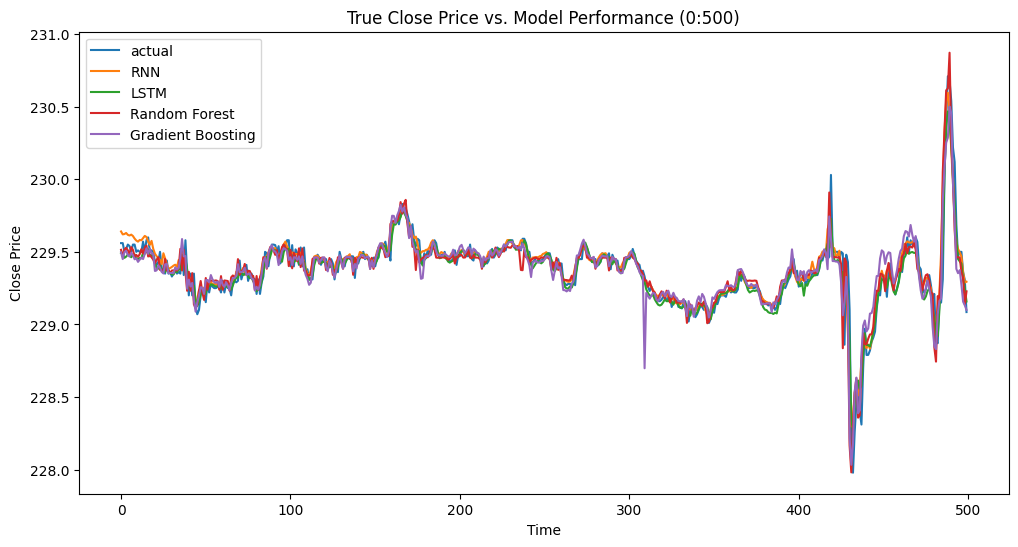

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(y_test_rnn[:500], label='actual')
plt.plot(pred_rnn[:500], label='RNN')
plt.plot(pred_lstm[:500], label='LSTM')
plt.plot(pred_rf[10:510], label='Random Forest')
plt.plot(pred_gb[10:510], label='Gradient Boosting')
plt.xlabel('Time')
plt.ylabel('Close Price')
plt.title('True Close Price vs. Model Performance (0:500)')
plt.legend()
plt.show()